### Preprocessing

In [24]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [8]:
d={'Iris-setosa':0, 
   'Iris-versicolor':1, 
   'Iris-virginica':2}

df= pd.read_csv('data/iris.csv')
df['Species'] = df['Species'].map(d)
df.head()

,Id,SepalLength[cm],SepalWidth[cm],PetalLength[cm],PetalWidth[cm],Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [16]:
print(np.unique(df['Species']))
df.shape

[0 1 2]


(150, 6)

In [12]:
X = df.iloc[:,1:5].values
y = df['Species'].values

----------------------

# Scikit-Learn

In [13]:
from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = \ 
        train_test_split(X,y,test_size=0.2, 
                         shuffle=True, random_state=123, stratify=y)
np.bincount(y_temp)

array([40, 40, 40], dtype=int64)

In [18]:
X_train, X_valid, y_train, y_valid = \
        train_test_split(X_temp,y_temp,test_size=0.2, 
                         shuffle=True, random_state=123, stratify=y_temp)

print('Train size', X_train.shape, 'class proportions' , np.bincount(y_train))
print('Valid size', X_valid.shape, 'class proportions' , np.bincount(y_valid))
print('Test size', X_test.shape, 'class proportions' , np.bincount(y_test))

Train size (96, 4) class proportions [32 32 32]
Valid size (24, 4) class proportions [8 8 8]
Test size (30, 4) class proportions [10 10 10]


##### K-NN

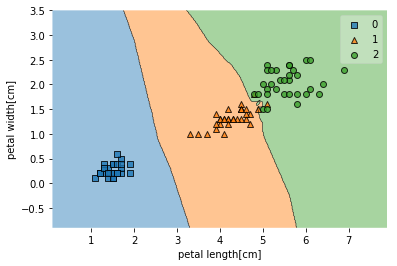

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train[:,2:],y_train) #fitting with Petal feature

plot_decision_regions(X_train[:,2:],y_train,knn_model)
plt.xlabel('petal length[cm]')
plt.ylabel('petal width[cm]')
plt.savefig('decisionreg.pdf')
plt.show()

---------

### Data Scailing

Normalization

In [27]:
x=np.arange(6).astype(float)
x

array([0., 1., 2., 3., 4., 5.])

In [28]:
x_norm = (x-x.min())/(x.max()-x.min())
x_norm

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

Standardization

In [30]:
x_std = (x-x.mean())/x.std()
x_std

array([-1.46385011, -0.87831007, -0.29277002,  0.29277002,  0.87831007,
        1.46385011])

In [42]:
mu, sigma = X_train.mean(axis=0), X_train.std(axis=0)

X_train_std=(X_train-mu)/sigma
X_valid_std=(X_valid-mu)/sigma #use train set's mu & sigma.
X_test_std=(X_test - mu)/sigma
X_test_std[:5]

array([[-0.43410382, -1.55836119,  0.01622744, -0.1401485 ],
       [-1.31809705, -0.15143949, -1.36851423, -1.19538429],
       [ 1.08131314,  0.55202136,  1.11248126,  1.70651413],
       [ 0.82874365,  0.31753441,  0.76629584,  1.04699176],
       [-1.82323603, -0.15143949, -1.4262118 , -1.32728877]])

----------

Scikit-Learn Transformer API

In [35]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()
#scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_valid_std = scaler.transform(X_valid)
X_test_std = scaler.transform(X_test)
X_test_std[:5]

array([[-0.43410382, -1.55836119,  0.01622744, -0.1401485 ],
       [-1.31809705, -0.15143949, -1.36851423, -1.19538429],
       [ 1.08131314,  0.55202136,  1.11248126,  1.70651413],
       [ 0.82874365,  0.31753441,  0.76629584,  1.04699176],
       [-1.82323603, -0.15143949, -1.4262118 , -1.32728877]])

--------

##### Categorical Data

In [46]:
df = pd.read_csv('data/categoricaldata.csv')
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XXL,15.3,class1


In [47]:
mapping_dict = {'M':2, 
                'L':3, 
                'XXL':5}
df['size']=df['size'].map(mapping_dict)
df

,color,size,price,classlabel
0,green,2,10.1,class1
1,red,3,13.5,class2
2,blue,5,15.3,class1


In [48]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['classlabel'] = le.fit_transform(df['classlabel'])
df

,color,size,price,classlabel
0,green,2,10.1,0
1,red,3,13.5,1
2,blue,5,15.3,0


In [49]:
pd.get_dummies(df)

,size,price,classlabel,color_blue,color_green,color_red
0,2,10.1,0,0,1,0
1,3,13.5,1,0,0,1
2,5,15.3,0,1,0,0


In [50]:
pd.get_dummies(df,drop_first=True)

,size,price,classlabel,color_green,color_red
0,2,10.1,0,1,0
1,3,13.5,1,0,1
2,5,15.3,0,0,0


-----------

##### Missing Data

In [51]:
df=pd.read_csv('data/missingdata.csv')
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [52]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [53]:
df.dropna(axis=0) #drop rows with missing data

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [54]:
df.dropna(axis=1) #drop cols with missing data

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [55]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X = df.values
X = imputer.fit_transform(df.values)
X

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

-------------

##### pipeline

In [58]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(StandardScaler(), 
                     KNeighborsClassifier(n_neighbors=3)) #data scailing, ML algorithm

pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

In [60]:
pipe.fit(X_train,y_train)
print(pipe.predict(X_test))
print(y_test)

[1 0 2 2 0 0 2 1 2 0 0 2 2 1 2 1 0 0 0 0 0 2 2 1 2 2 1 1 1 1]
[1 0 2 2 0 0 2 1 2 0 0 1 2 1 2 1 0 0 0 0 0 2 2 1 2 2 1 1 1 1]
